In [1]:
using PhyloClustering
using PhyloNetworks
using Distances
using DataStructures
using MultivariateStats

In [168]:
# Concatenate all files into one text file with all gene trees.
trees = HybridNetwork[]
for i in 0:371
    tree = readTopology("../../data/baobabs/genetrees/" * string(i) * ".treefile")
    if length(sort(tipLabels(tree)))!= 9
        continue
    end
    push!(trees,tree)
end
writeMultiTopology(trees, "../../data/baobabs/trees.trees")

In [24]:
origin = readMultiTopology("../../data/baobabs/trees_rooted.trees")
trees = split_weight(origin, 9);
trees = standardize_tree(trees);

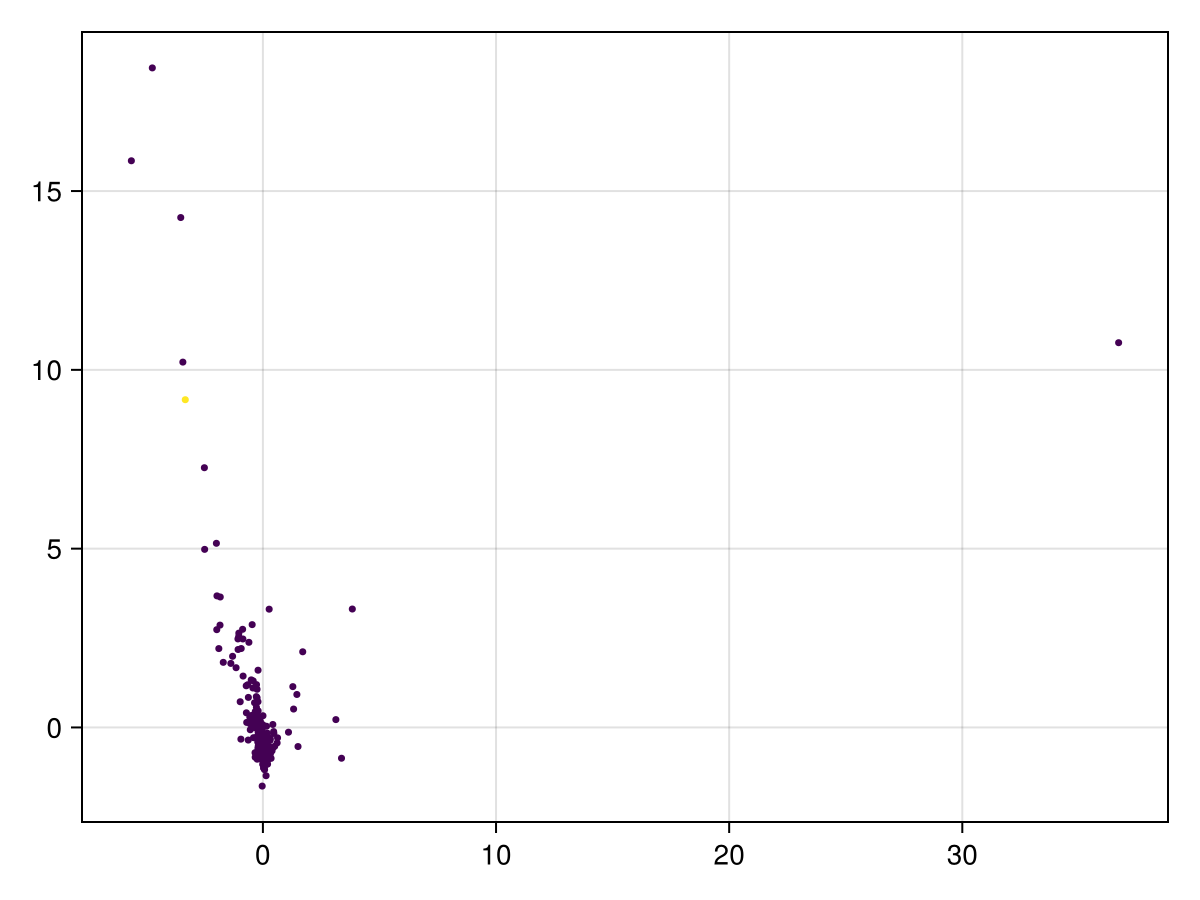

In [5]:
label = kmeans_label(trees, 2)
plot_clusters(trees, label)

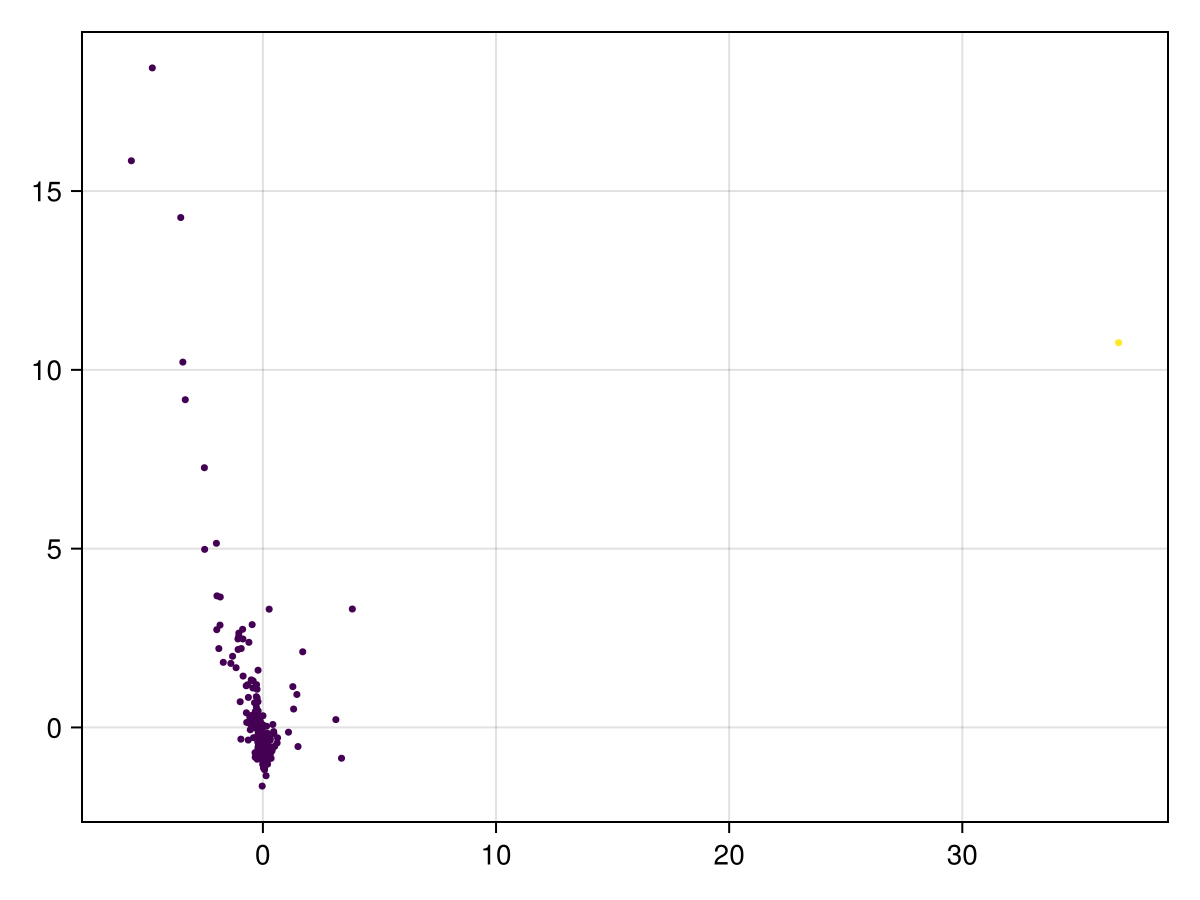

In [6]:
matrix = pairwise(Euclidean(), trees, dims=2)
label = hc_label(matrix, 2)
plot_clusters(trees, label)

In [25]:
PCA_model = fit(PCA, trees, maxoutdim = 2);
PCA_data = predict(PCA_model,trees)
outlier = []
outlier_PCA = []
index = []
for i in 1:size(PCA_data, 2)
    if PCA_data[:,i][2] >10
        append!(outlier, [origin[i]])
        append!(outlier_PCA, [PCA_data[:,i]])
        append!(index,i)
    end
end

index = unique(index)
deleteat!(origin, (i for i in index));
display(outlier_PCA)
display(outlier)

5-element Vector{Any}:
 [-4.7436975631973555, 18.443689332854206]
 [-5.6423771367402225, 15.84676395149603]
 [-3.433411194988657, 10.216404173928016]
 [36.70575161730652, 10.75928081447027]
 [-3.523993160952025, 14.259148324753397]

5-element Vector{Any}:
 HybridNetwork, Rooted Network
16 edges
17 nodes: 9 tips, 0 hybrid nodes, 8 internal tree nodes.
tip labels: Aza037, Adi001, Asu001, Aga001, ...
(((((Aza037:0.01,Adi001:0.021):0.017,Asu001:0.013):0.007,((Aga001:0.002,(Age001:0.022,Aru001:0.015):0.024):0.013,Ape001:0.013):0.025):0.03,Ama006:0.042):0.069,Smi165:0.0);

 HybridNetwork, Rooted Network
16 edges
17 nodes: 9 tips, 0 hybrid nodes, 8 internal tree nodes.
tip labels: Aga001, Ape001, Adi001, Age001, ...
(((((Aga001:0.008,Ape001:0.011):0.0,Adi001:0.021):0.007,(Age001:0.073,(Aru001:0.011,Asu001:0.011):0.056):0.055):0.012,(Ama006:0.006,Aza037:0.005):0.038):0.008,Smi165:0.0);

 HybridNetwork, Rooted Network
16 edges
17 nodes: 9 tips, 0 hybrid nodes, 8 internal tree nodes.
tip labels: Aza037, Adi001, Aga001, Age001, ...
((((Aza037:0.009,Adi001:0.016):0.004,(((Aga001:0.004,Age001:0.066):0.163,Ape001:0.074):0.0,Aru001:0.01):0.003):0.026,(Ama006:0.032,Asu001:0.025):0.006):0.115,Smi165:0.0);

 HybridNetwork, Rooted N

In [5]:
trees = print_bipartition(origin, 9);
trees = standardize_tree(trees);

Accumulator{Int64, Int64} with 2 entries:
  2 => 1
  1 => 362

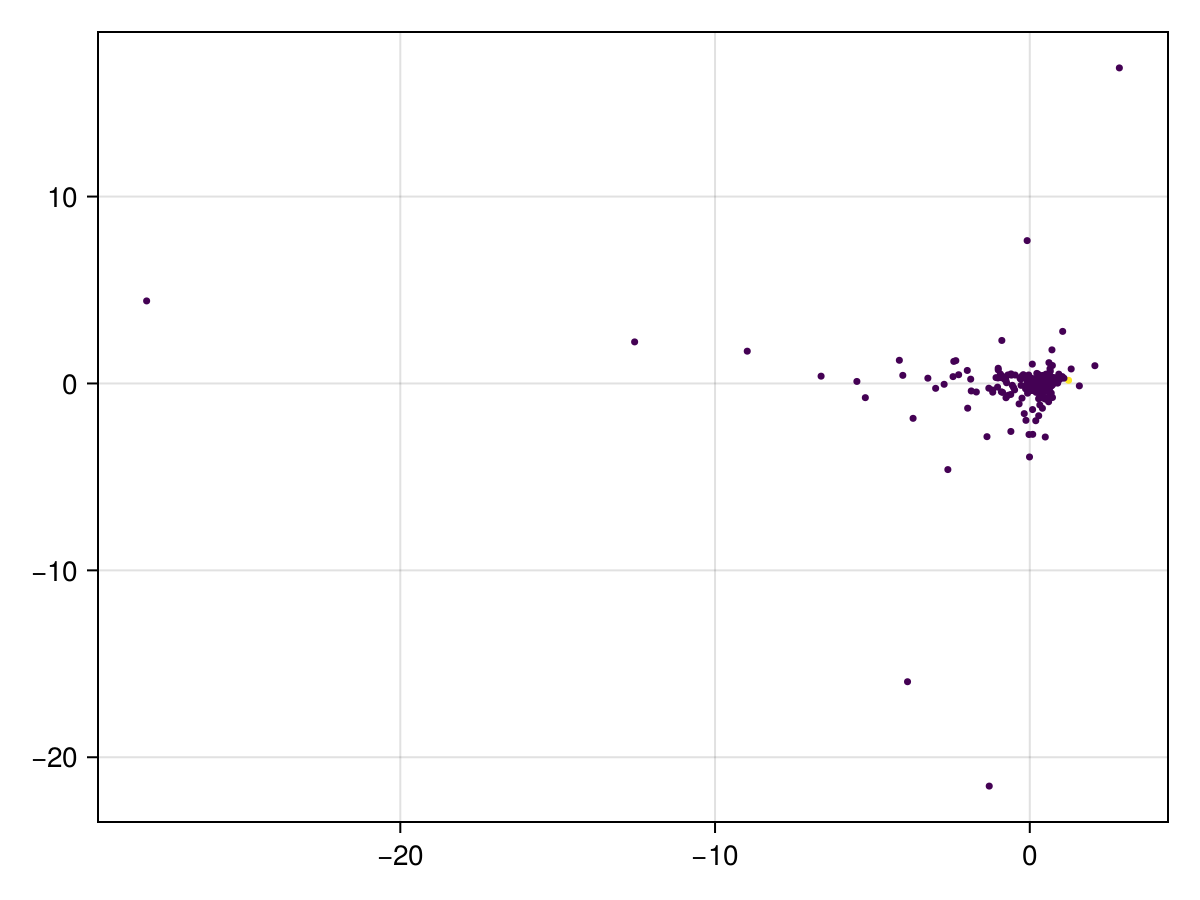

In [48]:
label = kmeans_label(trees, 2)
display(counter(label))
plot_clusters(trees, label)

In [13]:
cluster_1 = Vector{HybridNetwork}()
cluster_2 = Vector{HybridNetwork}() 
for i in 1:length(origin)
    if label[i] == 1
        push!(cluster_1,origin[i])
    else
        push!(cluster_2,origin[i])
    end
end

In [15]:
writeMultiTopology(cluster_1, "../../data/baobabs/kmeans_1.trees")
writeMultiTopology(cluster_2, "../../data/baobabs/kmeans_2.trees")

Accumulator{Int64, Int64} with 2 entries:
  2 => 3
  1 => 360

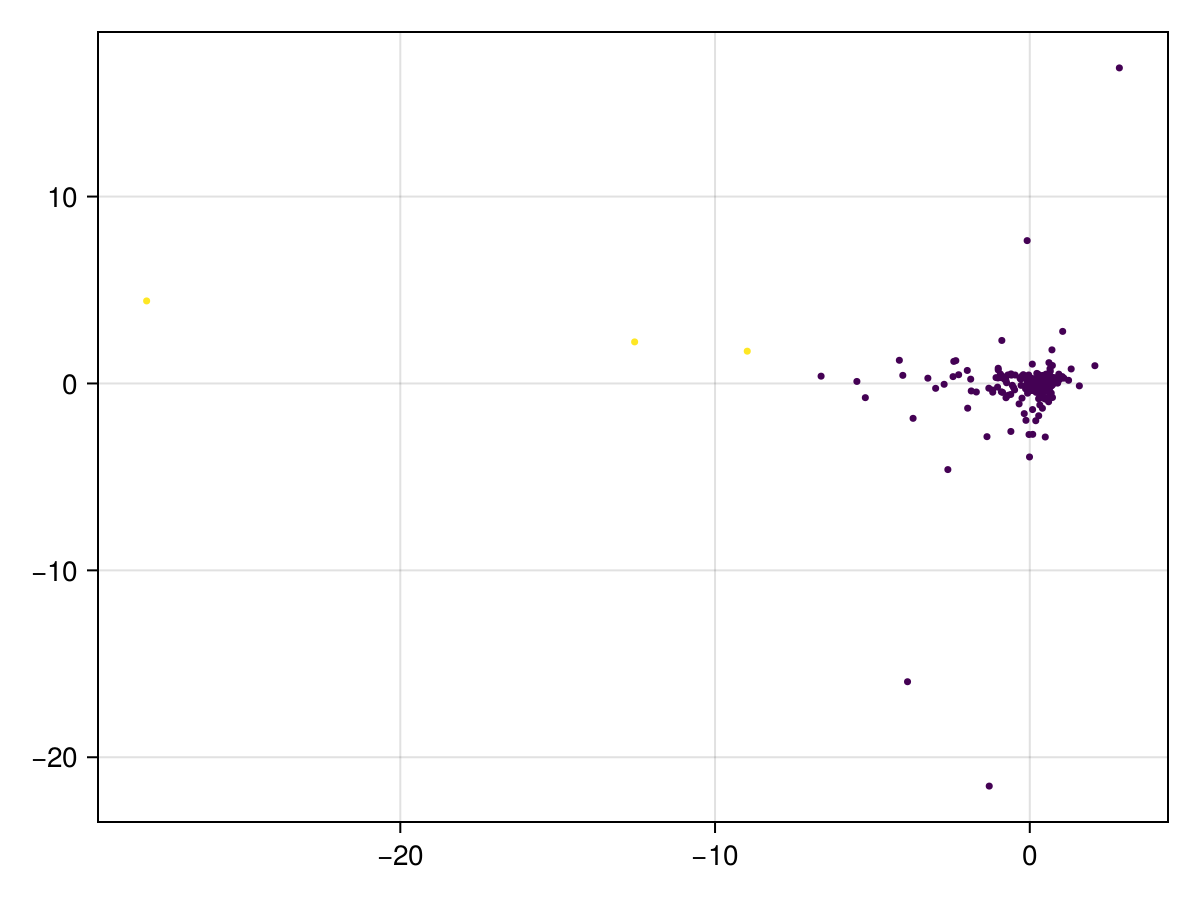

In [16]:
matrix = pairwise(Euclidean(), trees, dims=2)
label = hc_label(matrix, 2)
display(counter(label))
plot_clusters(trees, label)

In [17]:
cluster_1 = Vector{HybridNetwork}()
cluster_2 = Vector{HybridNetwork}() 
for i in 1:length(origin)
    if label[i] == 1
        push!(cluster_1,origin[i])
    else
        push!(cluster_2,origin[i])
    end
end

In [18]:
writeMultiTopology(cluster_1, "../../data/baobabs/hc_1.trees")
writeMultiTopology(cluster_2, "../../data/baobabs/hc_2.trees")

In [2]:
using PhyloPlots
using CSV
using DataFrames

In [195]:
cluster1 = readMultiTopology("../../data/baobabs/kmeans_1.trees")
cluster2 = readMultiTopology("../../data/baobabs/kmeans_2.trees")
origin = readMultiTopology("../../data/baobabs/trees.trees");

In [196]:
trees = print_bipartition(origin, 9);
trees = standardize_tree(trees);
PCA_model = fit(PCA, trees, maxoutdim = 2);
PCA_data = predict(PCA_model,trees)
outlier = []
outlier_PCA = []
index = []
for i in 1:size(PCA_data, 2)
    if PCA_data[:,i][2] >10
        append!(outlier, [origin[i]])
        append!(outlier_PCA, [PCA_data[:,i]])
        append!(index,i)
    end
end

index = unique(index)
deleteat!(origin, (i for i in index));

In [197]:
topo_cluster1 =  map(writeTopology, cluster1);
topo_cluster2 =  map(writeTopology, cluster2);
topo_origin = map(writeTopology, origin);
label = Array{Int64}(undef, length(origin));

In [198]:
for i in 1:length(origin)
    if topo_origin[i] in topo_cluster1
        label[i] = 1
    elseif topo_origin[i] in topo_cluster2
        label[i] = 2
    end
end

In [201]:
counter(label)

Accumulator{Int64, Int64} with 2 entries:
  2 => 22
  1 => 341

In [202]:
trees = print_bipartition(origin, 9);
trees = standardize_tree(trees);
PCA_model = fit(PCA, trees, maxoutdim = 2);
PCA_data = predict(PCA_model,trees)
df = DataFrame(PCA_data', [:PC1,:PC2])
df[!, :label] = label;

In [203]:
df

Row,PC1,PC2,label
,Float64,Float64,Int64
1,-1.98571,0.695454,1
2,-0.736792,0.0371559,2
3,0.299493,-0.527621,1
4,0.602515,0.169399,1
5,0.812606,0.085537,1
6,0.564268,0.187516,1
7,0.589945,0.412197,1
8,0.314051,0.381867,1
9,0.612239,0.203714,1


In [204]:
CSV.write("../../data/baobabs/cluster_PCA.csv", df) 

"../../data/baobabs/cluster_PCA.csv"

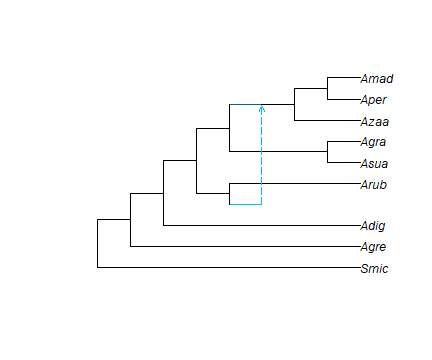

In [211]:
net1 = readTopology("(Smic:18.12505298,(Agre:8.747492442,(Adig:8.308140028,((#H1:0.0::0.117935,Arub:3.476676179):2.658717826,((Asua:3.171531094,Agra:3.171531094):2.767496398,((Azaa:1.381629136,(Aper:1.363263922,Amad:1.363263922):0.01836521346):2.095047043)#H1:2.460938604::0.882065):0.1963665132):2.172746023):0.4393524143):9.377560535);")
plot(net1, :R);

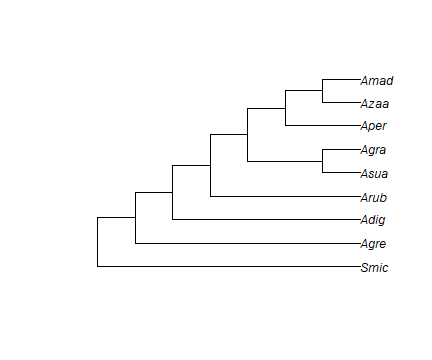

In [214]:
tree1 = readTopology("(Smic:18.12505298,(Agre:8.747492442,(Adig:8.308140028,(Arub:6.135394005,((Asua:3.171531094,Agra:3.171531094):2.767496398,(Aper:1.363263922,(Azaa:1.381629136,Amad:1.363263922):0.01836521346):4.555985647):0.1963665132):2.172746023):0.4393524143):9.377560535);")
plot(tree1, :R);

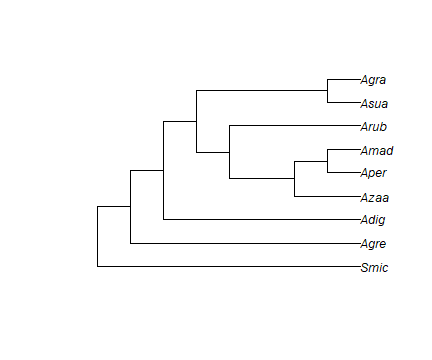

In [7]:
tree2 = readTopology("(Smic:18.12505298,(Agre:8.747492442,(Adig:8.308140028,((((Azaa:1.381629136,(Aper:1.363263922,Amad:1.363263922):0.01836521346):2.095047043),Arub:3.476676179):2.658717826,((Asua:3.171531094,Agra:3.171531094)):2.9638629112):2.172746023):0.4393524143):9.377560535);")
plot(tree2, :R);

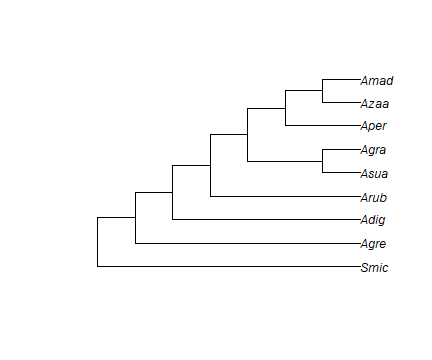

In [3]:
tree2 = readTopology("(Smic:18.12505298,(Agre:8.747492442,((Adig:8.308140028,(((Azaa:1.381629136,(Aper:1.363263922,Amad:1.363263922):0.01836521346):2.095047043),Arub:3.476676179):2.658717826),(Asua:3.171531094,Agra:3.171531094):2.9638629112):2.172746023):0.4393524143):9.377560535);")
plot(tree2, :R);